# Imports:

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import os

from library.sb_utils import save_file

# Load car data:

In [2]:
# the supplied CSV data file is the raw_data directory
car_data = pd.read_csv('../raw_data/car_data.csv')
#Call the info method on car_data to see a summary of the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [3]:
#Print the first several rows of the data
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Explore the Data

1. Check how many missing values in each column as well as the percentage

In [4]:
missing = pd.concat([car_data.isnull().sum(), 100 * car_data.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by=['count'])

,count,%
Make,0,0.000000
Model,0,0.000000
Year,0,0.000000
Transmission Type,0,0.000000
Driven_Wheels,0,0.000000
Vehicle Size,0,0.000000
Vehicle Style,0,0.000000
highway MPG,0,0.000000
city mpg,0,0.000000
Popularity,0,0.000000


Most of columns don't have missing value or have little missing vaule. However, the Market Category has more than 31% missing values. It is worth to take a look into it since it is a very useful information.

In [5]:
#Take a look at the data without market category
nocat_car = car_data[car_data['Market Category'].isnull()]
cat_car = car_data[~car_data['Market Category'].isnull()]
nocat_car.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,3742.000000,3731.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,2006.688669,194.961136,5.364778,3.474345,25.687333,18.968199,1676.889364,19961.397114
std,8.732324,69.030672,1.388181,0.846875,7.162941,6.090453,1494.869342,13360.041354
min,1990.000000,66.000000,0.000000,2.000000,12.000000,10.000000,26.000000,2000.000000
25%,1999.000000,150.000000,4.000000,3.000000,20.000000,15.000000,549.000000,3096.750000
50%,2008.000000,180.000000,6.000000,4.000000,24.000000,18.000000,1385.000000,21690.000000
75%,2015.000000,230.000000,6.000000,4.000000,30.000000,22.000000,2031.000000,27850.000000
max,2017.000000,450.000000,8.000000,4.000000,92.000000,120.000000,5657.000000,68996.000000


In [6]:
cat_car.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,8172.000000,8114.000000,8142.000000,8166.000000,8172.000000,8172.000000,8172.000000,8.172000e+03
mean,2012.076603,274.411881,5.750184,3.418565,27.072565,20.083578,1499.056779,5.004285e+04
std,6.303389,115.006666,1.922330,0.896161,9.509652,10.020038,1413.501876,7.001284e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2010.000000,192.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.598500e+04
50%,2015.000000,263.000000,6.000000,4.000000,26.000000,18.000000,1013.000000,3.501000e+04
75%,2016.000000,320.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.881750e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
'BMW' in nocat_car.Make

False

There is no clear pattern that shows it is missing not at random. Missing value might be caused by parsing from difference sources. We will take a closer look later on. For now, just keep all rows. It is a good news that our car maker of interest, BMW, has no uncategorized car model. 

In [8]:
print(car_data['Market Category'].unique())

['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance' 'Flex Fuel'
 'Flex Fuel,Performance' nan 'Hatchback' 'Hatchback,Luxury,Performance'
 'Hatchback,Luxury' 'Luxury,High-Performance,Hybrid' 'Diesel,Luxury'
 'Hatchback,Performance' 'Hatchback,Factory Tuner,Performance'
 'High-Performance' 'Factory Tuner,High-Performance'
 'Exotic,High-Performance' 'Exotic,Factory Tuner,High-Performance'
 'Factory Tuner,Performance' 'Crossover' 'Exotic,Luxury'
 'Exotic,Luxury,High-Performance' 'Exotic,Luxury,Performance'
 'Factory Tuner,Luxury,Performance' 'Flex Fuel,Luxury' 'Crossover,Luxury'
 'Hatchback,Factory Tuner,Luxury,Performance' 'Crossover,Hatchback'
 'Hybrid' 'Luxury,Performance,Hybrid'
 'Crossover,Luxury,Performance,Hybrid' 'Crossover,Luxury,Performance'
 'Exotic,Factory Tuner,Luxury,High-Performance'
 'Flex Fuel,Luxury,High-Performance' 'Crossover,Flex Fuel' 'Diesel'
 'Hatchback,Diesel' 'Crossover,Luxury,Diesel'
 'Crossover,Luxury,Hi

It looks like the Market Category for each car model oftenly includes more than one category. It will be easier if they can be separated.

In [9]:
market_category = car_data['Market Category'].str.get_dummies(',')
market_category

,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,0,0,0,1,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
11909,1,0,0,0,0,1,0,0,1,0
11910,1,0,0,0,0,1,0,0,1,0
11911,1,0,0,0,0,1,0,0,1,0
11912,1,0,0,0,0,1,0,0,1,0


There are 10 types of Market Category. Let's replace the original market category with this new one.

In [10]:
car_data = car_data.drop(columns='Market Category')
car_data = pd.concat([car_data, market_category], axis = 1)

In [11]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
 15  Crossover          11914 non-null  int64  
 16  Diesel             119

In [12]:
#Drop duplicate rows
car_data = car_data.drop_duplicates()
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11196 non-null  object 
 4   Engine HP          11130 non-null  float64
 5   Engine Cylinders   11169 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Vehicle Size       11199 non-null  object 
 10  Vehicle Style      11199 non-null  object 
 11  highway MPG        11199 non-null  int64  
 12  city mpg           11199 non-null  int64  
 13  Popularity         11199 non-null  int64  
 14  MSRP               11199 non-null  int64  
 15  Crossover          11199 non-null  int64  
 16  Diesel             111

In [13]:
#Filter the dataframe to display just the rows for BMW 
BMW_car = car_data[car_data.Make == 'BMW']
BMW_car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,1,0,0,1,0,1,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,1,0,1,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11901,BMW,Z4,2016,premium unleaded (required),240.0,4.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
11902,BMW,Z4,2016,premium unleaded (required),335.0,6.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,1,0,1,0
11903,BMW,Z8,2001,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,1,0,0,0,1,0,1,0
11904,BMW,Z8,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,1,0,0,0,1,0,1,0


In [14]:
BMW_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 11905
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               324 non-null    object 
 1   Model              324 non-null    object 
 2   Year               324 non-null    int64  
 3   Engine Fuel Type   324 non-null    object 
 4   Engine HP          324 non-null    float64
 5   Engine Cylinders   324 non-null    float64
 6   Transmission Type  324 non-null    object 
 7   Driven_Wheels      324 non-null    object 
 8   Number of Doors    324 non-null    float64
 9   Vehicle Size       324 non-null    object 
 10  Vehicle Style      324 non-null    object 
 11  highway MPG        324 non-null    int64  
 12  city mpg           324 non-null    int64  
 13  Popularity         324 non-null    int64  
 14  MSRP               324 non-null    int64  
 15  Crossover          324 non-null    int64  
 16  Diesel             324 n

It is good to know that BMW does not have any missing values in their data.

Let's get through all other categorical features one by one to see if all categories make sense.

In [15]:
car_data['Engine Fuel Type'].value_counts()

regular unleaded                                6658
premium unleaded (required)                     1956
premium unleaded (recommended)                  1392
flex-fuel (unleaded/E85)                         887
diesel                                           150
electric                                          66
flex-fuel (premium unleaded required/E85)         53
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [16]:
car_data['Transmission Type'].value_counts()

AUTOMATIC           7932
MANUAL              2634
AUTOMATED_MANUAL     553
DIRECT_DRIVE          68
UNKNOWN               12
Name: Transmission Type, dtype: int64

In [17]:
car_data['Driven_Wheels'].value_counts()

front wheel drive    4354
rear wheel drive     3212
all wheel drive      2308
four wheel drive     1325
Name: Driven_Wheels, dtype: int64

In [18]:
car_data['Vehicle Size'].value_counts()

Compact    4395
Midsize    4121
Large      2683
Name: Vehicle Size, dtype: int64

In [19]:
car_data['Vehicle Style'].value_counts()

Sedan                  2843
4dr SUV                2434
Coupe                  1175
Convertible             741
4dr Hatchback           663
Crew Cab Pickup         655
Extended Cab Pickup     597
Wagon                   562
2dr Hatchback           412
Passenger Minivan       389
Regular Cab Pickup      345
Passenger Van           121
2dr SUV                  91
Cargo Van                84
Cargo Minivan            59
Convertible SUV          28
Name: Vehicle Style, dtype: int64

All categorical features look good. It is time to take a look at the numerical data.

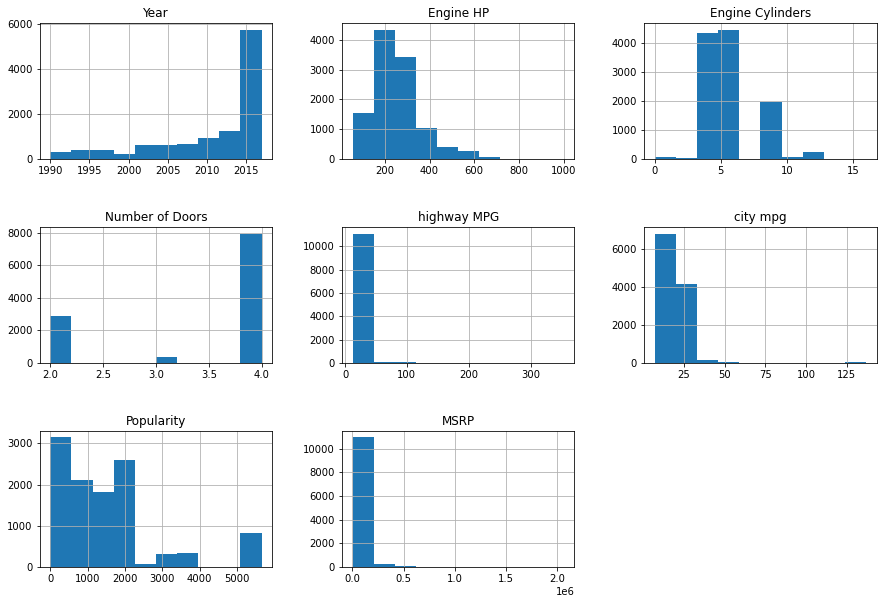

In [20]:
#Plot the distribution of all numetrical features
num_set = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
car_data[num_set].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Both highway MPG and MSPR are highly skewed distribution. The city mpg is also skewed. It might be wrong with some values.

In [21]:
#Filter the 'highway MPG' column to print the values greater than 100
car_data.loc[car_data['highway MPG']>110].T

,1119,5790,5791,5792
Make,Audi,BMW,BMW,BMW
Model,A6,i3,i3,i3
Year,2017,2015,2016,2017
Engine Fuel Type,premium unleaded (recommended),electric,electric,electric
Engine HP,252,170,170,170
Engine Cylinders,4,0,0,0
Transmission Type,AUTOMATED_MANUAL,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE
Driven_Wheels,front wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,4,4,4,4
Vehicle Size,Midsize,Compact,Compact,Compact


The highway MPG for Audi is apparenly wrong. After looking up the internet, it was found that the correct highway MPG for Audi A6 2017 model is 34. Let's correct the value.

In [22]:
car_data.loc[1119,'highway MPG'] = 34

In [23]:
#Filter the 'highway MPG' column to print the values greater than 100
car_data.loc[car_data['city mpg']>110].T

,539,540,541,1983,1984,3716,3717,3718,3719,4705,...,9851,9852,9853,9854,9867,9868,9869,9870,9871,9872
Make,FIAT,FIAT,FIAT,Chevrolet,Chevrolet,Volkswagen,Volkswagen,Volkswagen,Volkswagen,Honda,...,Kia,Kia,Kia,Kia,Chevrolet,Chevrolet,Chevrolet,Chevrolet,Chevrolet,Chevrolet
Model,500e,500e,500e,Bolt EV,Bolt EV,e-Golf,e-Golf,e-Golf,e-Golf,Fit EV,...,Soul EV,Soul EV,Soul EV,Soul EV,Spark EV,Spark EV,Spark EV,Spark EV,Spark EV,Spark EV
Year,2015,2016,2017,2017,2017,2015,2015,2016,2016,2013,...,2015,2016,2016,2016,2014,2014,2015,2015,2016,2016
Engine Fuel Type,electric,electric,electric,electric,electric,electric,electric,electric,electric,electric,...,electric,electric,electric,electric,electric,electric,electric,electric,electric,electric
Engine HP,NaN,NaN,NaN,200,200,115,115,115,115,NaN,...,NaN,NaN,NaN,NaN,140,140,140,140,140,140
Engine Cylinders,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
Transmission Type,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,...,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE,DIRECT_DRIVE
Driven_Wheels,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,...,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive,front wheel drive
Number of Doors,2,2,2,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Vehicle Size,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,...,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact


Electric car has high city mpg which make sense. The skewed value is reasonable.

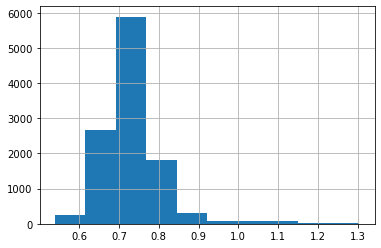

In [24]:
#Take a ratio of city MPG over highway MPG
ratio_MPG = car_data['city mpg']/car_data['highway MPG']
ratio_MPG.hist()
plt.show()

The distribution looks right. We can assume that all MPG data are reasonable.

In [25]:
#Filter the 'highway MPG' column to print the values greater than 100
car_data.loc[car_data['MSRP']>300000].Make.unique()

array(['Maybach', 'Ferrari', 'Lamborghini', 'Bentley', 'Porsche',
       'Rolls-Royce', 'Lexus', 'Mercedes-Benz', 'Aston Martin', 'Bugatti'],
      dtype=object)

The list above are all luxury brands that make high-performance sports car. It is reasonable to have a super high price compared to most of the cars. 

In [26]:
#Take a look at Engine Fuel Type
car_data['Engine Fuel Type'].unique().tolist()

['premium unleaded (required)',
 'regular unleaded',
 'premium unleaded (recommended)',
 'flex-fuel (unleaded/E85)',
 'diesel',
 'electric',
 'flex-fuel (premium unleaded recommended/E85)',
 'natural gas',
 'flex-fuel (premium unleaded required/E85)',
 'flex-fuel (unleaded/natural gas)',
 nan]

In [27]:
car_data.loc[car_data['Engine Fuel Type'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,...,0,0,0,0,0,0,0,0,0,0
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,...,0,0,0,0,0,0,0,0,0,0
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,...,0,0,0,0,0,0,0,0,0,0


After searching on the internet, it was confirmed that Suzuki Model Verona 2004 has "regular unleaded" for engine fuel type. Let's fill that in.

In [28]:
car_data['Engine Fuel Type'] = car_data['Engine Fuel Type'].fillna('regular unleaded')
car_data['Engine Fuel Type'].unique().tolist()

['premium unleaded (required)',
 'regular unleaded',
 'premium unleaded (recommended)',
 'flex-fuel (unleaded/E85)',
 'diesel',
 'electric',
 'flex-fuel (premium unleaded recommended/E85)',
 'natural gas',
 'flex-fuel (premium unleaded required/E85)',
 'flex-fuel (unleaded/natural gas)']

In [29]:
#Take a look at Engine Cylinders
car_data['Engine Cylinders'].unique().tolist()

[6.0, 4.0, 5.0, 8.0, 12.0, 0.0, nan, 10.0, 3.0, 16.0]

In [30]:
car_data.loc[car_data['Engine Cylinders'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,...,0,0,0,0,0,1,0,0,0,0
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,...,0,0,0,0,0,1,0,0,0,0
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,...,0,0,0,0,0,1,0,0,0,0
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,...,0,0,0,0,0,1,0,0,0,0
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,...,0,0,0,0,0,1,0,0,0,0
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,...,0,0,0,0,0,1,0,0,0,0
5778,Mitsubishi,i-MiEV,2014,electric,NaN,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,...,0,0,0,0,0,1,0,0,0,0
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,...,0,0,0,0,0,1,0,0,0,0
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,...,0,0,0,0,0,1,0,0,0,0
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Midsize,...,1,0,0,0,0,0,0,0,0,0


The models above has no engine cylinders. Assign 0 to replace null value.

In [31]:
car_data['Engine Cylinders'] = car_data['Engine Cylinders'].fillna(0)

In [32]:
#Check if NaN is gone.
car_data['Engine Cylinders'].unique().tolist()

[6.0, 4.0, 5.0, 8.0, 12.0, 0.0, 10.0, 3.0, 16.0]

In [33]:
car_data.loc[car_data['Number of Doors'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,Large,...,0,0,1,0,0,0,1,0,0,0
6930,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,...,0,0,1,0,0,0,0,0,0,1
6931,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,...,0,0,1,0,0,0,0,0,0,1
6932,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,...,0,0,1,0,0,0,1,0,0,0
6933,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,NaN,Large,...,0,0,1,0,0,0,0,0,0,1
6934,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,...,0,0,1,0,0,0,0,0,0,1


After searching on the internet, it was confirmed that Ferrari has 2 doors and Tesla Model S has 4 doors. 

In [34]:
car_data.loc[4666,'Number of Doors'] = 2
car_data['Number of Doors'] = car_data['Number of Doors'].fillna(4)
car_data['Number of Doors'].unique()

array([2., 4., 3.])

In [35]:
#Take a look at the Engine Horsepower
car_data.loc[car_data['Engine HP'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,...,0,0,0,0,0,1,0,0,0,0
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,...,0,0,0,0,0,1,0,0,0,0
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,...,0,0,0,0,0,1,0,0,0,0
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,...,0,0,0,0,0,0,0,0,1,0
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,...,0,0,0,0,0,0,0,0,0,0
9851,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,...,0,0,0,0,0,0,0,0,0,0
9852,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,...,0,0,0,0,0,0,0,0,0,0
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,...,0,0,0,0,0,0,0,0,0,0


In [36]:
car_data.loc[car_data['Engine HP'].isnull()]['Engine Fuel Type'].unique()

array(['electric', 'premium unleaded (recommended)', 'regular unleaded',
       'flex-fuel (unleaded/natural gas)', 'diesel'], dtype=object)

Non-electric car should have horsepower. We can try to fill them up with information found online.

In [37]:
car_data.loc[(car_data['Engine HP'].isnull())&(car_data['Engine Fuel Type']!='electric')].iloc[:,:15]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,27,18,61,62915
2907,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,27,18,61,53915
2908,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,64915
4203,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,30,23,5657,29100
4204,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,28,22,5657,30850
4205,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,28,22,5657,26850
4206,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,30,23,5657,25100
4914,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,22,16,5657,28030
4915,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,22,16,5657,23930


In [38]:
#Fill missing information with horsepower found online
car_data.loc[[4914,4915,4916,4917,4918,4919],'Engine HP'] = 193
car_data.loc[[4203,4206],'Engine HP'] = 179
car_data.loc[[4204,4205],'Engine HP'] = 245
car_data.loc[[2905,2908],'Engine HP'] = 305
car_data.loc[[2906,2907],'Engine HP'] = 335
car_data.loc[[5825,5830],'Engine HP'] = 260
car_data.loc[[5831,5833,5839,5840],'Engine HP'] = 305
car_data.loc[[6908,6910,6916,6918],'Engine HP'] = 245
car_data.loc[[6578],'Engine HP'] = 200

In [39]:
#Make sure all blanks were filled up
car_data.loc[(car_data['Engine HP'].isnull())&(car_data['Engine Fuel Type']!='electric')].iloc[:,:15]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


# Save data

In [40]:
car_data.shape

(11199, 25)

In [41]:
#save the data to a new csv file
datapath = '../data'
save_file(car_data, 'car_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/car_data_cleaned.csv"


# Summary

There are 11914 rows in the original data. BMW was present in the data with no missing values. The duplicate rows were dropped. There are about 31% missing values in Market Category column. Those rows were kept for further study. The data is now ready for further analysis and modeling. The MSRP is the target feature. After data wrangling, there are 11199 rows left in the data.